<a href="https://colab.research.google.com/github/kimvkemenade/DM_team16/blob/main/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 (Group 16)**


# Cleaning data

In [1]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# downloading the dataset
!kaggle datasets download rodsaldanha/arketing-campaign

# unzipping the dataset
!unzip arketing-campaign.zip

df_raw = pd.read_csv('marketing_campaign.csv', sep = ';')
marketing_df = df_raw.copy()

Dataset URL: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign
License(s): other
arketing-campaign.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  arketing-campaign.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("Shape of the dataframe:", marketing_df.shape)
marketing_df.info()

Shape of the dataframe: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

| #  | Variable               | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign, 0 otherwise           
| 2  | AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise           |
| 3  | AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise           |
| 4  | AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign, 0 otherwise           |
| 5  | AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign, 0 otherwise           |
| 6  | Response (target)      | 1 if customer accepted the offer in the last campaign, 0 otherwise          |
| 7  | Complain               | 1 if customer complained in the last 2 years                                |
| 8  | DtCustomer             | date of customer’s enrolment with the company                               |
| 9  | Education              | customer’s level of education                                               |
| 10 | Marital                | customer’s marital status                                                   |
| 11 | Kidhome                | number of small children in customer’s household                            |
| 12 | Teenhome               | number of teenagers in customer’s household                                 |
| 13 | Income                 | customer’s yearly household income                                          |
| 14 | MntFishProducts        | amount spent on fish products in the last 2 years                           |
| 15 | MntMeatProducts        | amount spent on meat products in the last 2 years                           |
| 16 | MntFruits              | amount spent on fruits products in the last 2 years                         |
| 17 | MntSweetProducts       | amount spent on sweet products in the last 2 years                          |
| 18 | MntWines               | amount spent on wine products in the last 2 years                           |
| 19 | MntGoldProds           | amount spent on gold products in the last 2 years                           |
| 20 | NumDealsPurchases      | number of purchases made with discount                                      |
| 21 | NumCatalogPurchases    | number of purchases made using catalogue                                    |
| 22 | NumStorePurchases      | number of purchases made directly in stores                                 |
| 23 | NumWebPurchases        | number of purchases made through company’s web site                         |
| 24 | NumWebVisitsMonth      | number of visits to company’s web site in the last month                    |
| 25 | Recency                | number of days since the last purchase                                      |

## Missing values

In [5]:
# Number of missing values
print(marketing_df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Since only 24 rows have missing values, we are dropping them, believing it will not affect the data:

In [8]:
# Dropping NAs
marketing_df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Checking whether there are duplicated values
marketing_df.duplicated().sum()

0

## Outliers

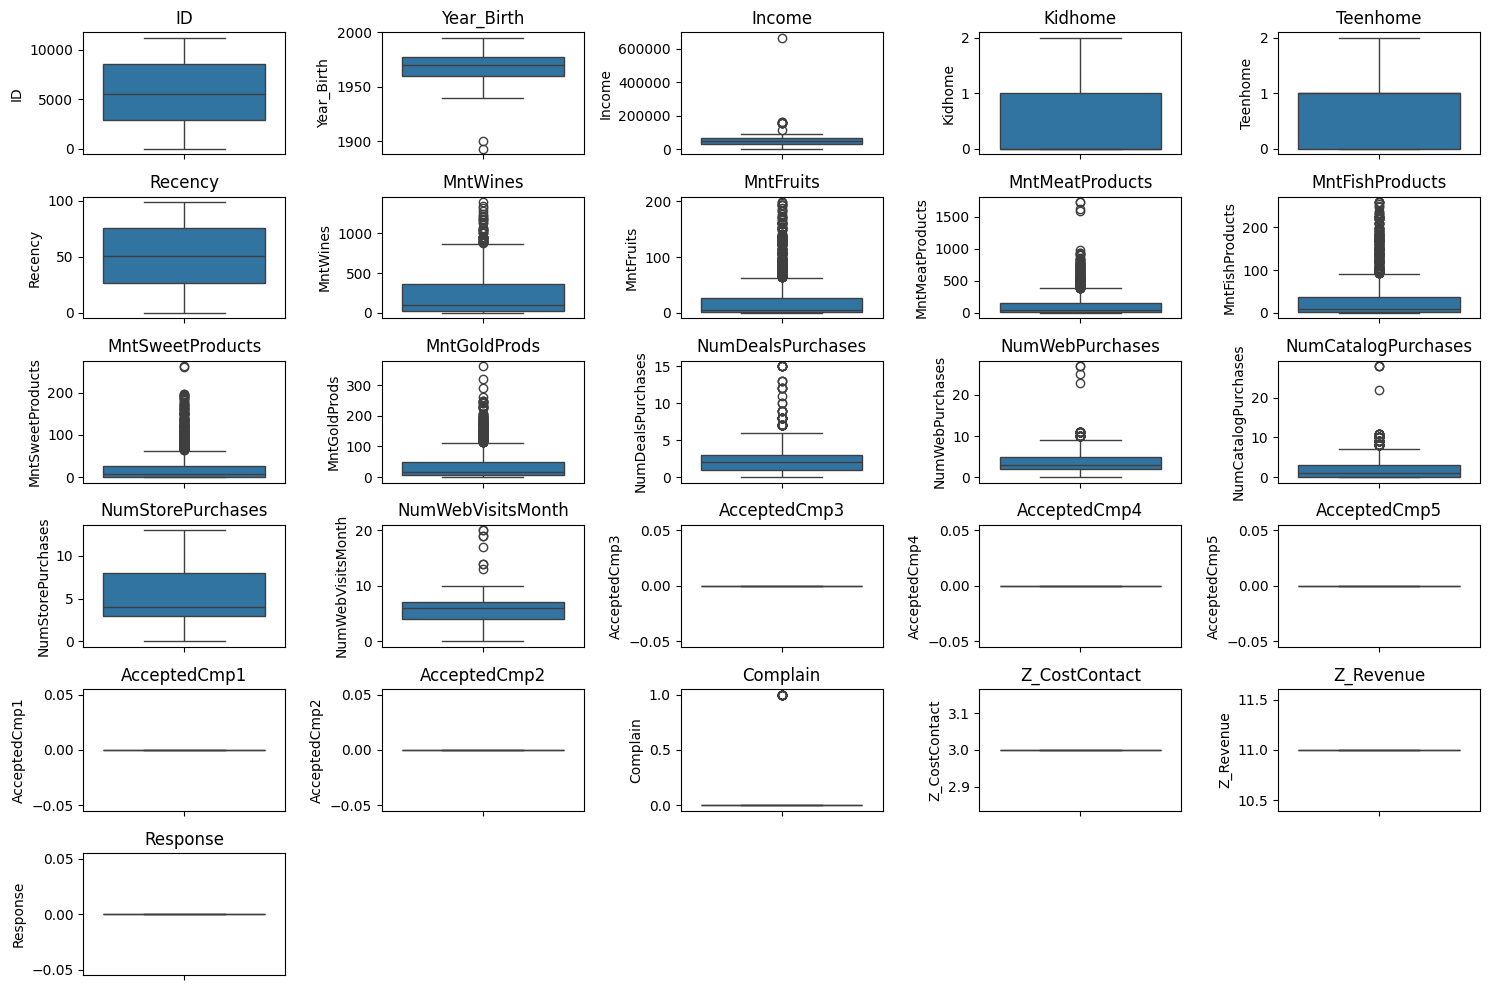

In [10]:
# selecting only numeric variables to check for the ouliers
numerical_columns = marketing_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//5 + 1, 5, i)
    sns.boxplot(y = marketing_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

It seems like variables `Income`, `NumWebPurchases`, `NumCatalogPurchases`, and `Complain` have some outliers.

To further investigate:

### Checking for the balanceness

In [6]:
not_accepted_df = marketing_df[(marketing_df['AcceptedCmp1'] == 0) &
                 (marketing_df['AcceptedCmp2'] == 0) &
                 (marketing_df['AcceptedCmp3'] == 0) &
                 (marketing_df['AcceptedCmp4'] == 0) &
                 (marketing_df['AcceptedCmp5'] == 0) &
                 (marketing_df['Response'] == 0)]

# Display the filtered DataFrame
not_accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [7]:
columns_to_check = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
accepted_df = marketing_df[(marketing_df[columns_to_check] != 0).any(axis=1)]

# Display the filtered DataFrame
accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,0,0,1,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0


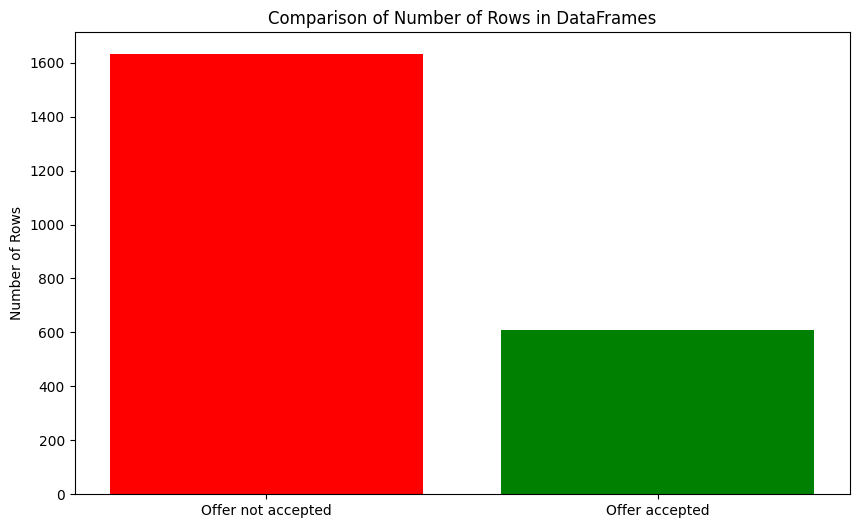

In [8]:
num_rows_filtered_df = len(not_accepted_df)
num_rows_filtered_non_zero_df = len(accepted_df)

# Data for plotting
data = {
    'DataFrame': ['Offer not accepted', 'Offer accepted'],
    'Number of Rows': [num_rows_filtered_df, num_rows_filtered_non_zero_df]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['DataFrame'], plot_df['Number of Rows'], color=['red', 'green'])
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows in DataFrames')
plt.show()

There is a significant bias in the data, if we want to predict this we need to deal with this unbalancedness. Additionally, since we are gonna use models that use distance metrics, we need to standardize our features. The codes for these tasks are located in the **Models** section.

# EDA

* **include some graphs**
* **association rule analysis**

# Models

* Feature selection (like k-fold, etc.)
* Balancing and standardization
* Our three models

In [ ]:
# Balancing the data


# Results